In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import proj1_helpers
%load_ext autoreload
%autoreload 2

In [2]:
yb, input_data, ids = proj1_helpers.load_csv_data("../train.csv",sub_sample = False)

In [214]:
def ultimate_split(yb, input_data, ids):
    """
    Split according to jet_num
    """
    
    mask_0 = (input_data[:,22] == 0)
    mask_1 = (input_data[:,22] == 1)
    mask_2 = (input_data[:,22] == 2)
    mask_3 = (input_data[:,22] == 3)
    
    

    
    return [[yb[mask_0], input_data[mask_0], ids[mask_0]], [yb[mask_1], input_data[mask_1], ids[mask_1]],
           [yb[mask_2], input_data[mask_2], ids[mask_2]],[yb[mask_3], input_data[mask_3], ids[mask_3]]]
a = [0,0,0,0]
def remove_features_0(input_data_0, eval = False):
    """
    Remove the useless features if the jet num feature is equal to 0
    """
    useless_features_index = [4, 5, 6, 12,22, 23, 24, 25 , 26, 27, 28]#, 30, 33]
    
    
    mask = np.ones(int(input_data_0.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    res = input_data_0[:,mask]
    if not eval:
        a[0] =  np.mean(res, axis= 0)
    for v in res:
        p=0
        v[3] = abs(v[3]-a[3])
    return res

def remove_features_1(input_data_1, eval = False):
    """
    Remove the useless features if the jet num feature is equal to 1
    """
    useless_features_index = [4, 5, 6, 12,22, 26, 27, 28]#, 30, 33]
    
    
    
    mask = np.ones(int(input_data_1.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    res = input_data_1[:,mask]
    if not eval:
        a[1] =  np.mean(res, axis= 0)
    for v in res:
        p=0
        #v[4] = abs(v[4]-a[4])
    return res

def remove_features_2(input_data_1, eval = False):
    """
    Remove the useless features if the jet num feature is equal to 1
    """
    useless_features_index = [22]#, 30, 33]
    
    mask = np.ones(int(input_data_1.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    res = input_data_1[:,mask]
    if not eval:
        a[2] =  np.mean(res, axis= 0)
    for v in res:
        p=0
        #v[8] = abs(v[8]-a[8])
    return res

def remove_features_3(input_data_1, eval = False):
    """
    Remove the useless features if the jet num feature is equal to 1
    """
    useless_features_index = [22]#, 30, 33]
    
    mask = np.ones(int(input_data_1.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return input_data_1[:,mask]

    # No need for jet_num equal to 2 or 3 : all the features are kept

def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x,axis=0)
    x = x - mean_x
    std_x = np.std(x,axis=0)
    std_x = np.where(std_x==0,1,std_x)
    x = x / std_x
    return x, std_x, mean_x
def split_1st_coordinate(y,x,id):
    y1,y2,x1,x2,id1,id2 = [],[],[],[],[],[]
    
    for i in range(len(y)):
        if x[i][0] == -999:
            y1.append(y[i])
            x1.append(x[i][1:])
            id1.append(id[i])
        else:
            y2.append(y[i])
            x2.append(x[i])
            id2.append(id[i])
            
    return [[y1, np.array(x1), id1], 
                     [y2, np.array(x2), id2]]

D contains all the datat structures, to acess data you should use D[num_jet_case*2 + value of first column is != -999] = y,x,id

In [215]:
data_splitted = ultimate_split(yb, input_data, ids)
data_splitted[0][1] = remove_features_0(data_splitted[0][1])
data_splitted[1][1] = remove_features_1(data_splitted[1][1])
data_splitted[2][1] = remove_features_2(data_splitted[2][1])
data_splitted[3][1] = remove_features_3(data_splitted[3][1])

D = []

standard_data = []

for d in data_splitted:
    s = split_1st_coordinate(d[0],d[1],d[2])
    
    s1 = standardize(s[0][1])
    s[0][1] = s1[0]
    standard_data.append([s1[1],s1[2]])
    
    s2 = standardize(s[1][1])
    s[1][1] = s2[0]
    standard_data.append([s2[1],s2[2]])
    
    
    np.hstack((s[0][1],np.ones((np.array(s[0][1]).shape[0],1))))
    np.hstack((s[1][1],np.ones((np.array(s[1][1]).shape[0],1))))
    
    D.append(s[0])
    D.append(s[1])
D = np.array(D)

In [216]:
def batch_ridge_in(lambda_, degree, batch_size,d,y,threshold,seed):
    #print(d.shape,y.shape)
    split_ratio = 0.9
    d_train, d_test, y_train, y_test = split_data(d,y,split_ratio,seed)
    x = []
    xt = []
    for i in range(1,degree+1):
        x.append(np.power(d_train,i))
        xt.append(np.power(d_test,i))
        
        
    X_train = np.concatenate(x,axis = 1)
    
    
    #y_train = y_in_train_ref
    X_test = np.concatenate(xt,axis = 1)
    #y_test = y_in_test_ref
    
    #print("X_train shape : ", X_train.shape,"    X_test.shape : ", X_test.shape)
    #print("y_train shape : ", y_train.shape,"    y_test.shape : ", y_test.shape)
    
    num_features = X_train[0].shape[0]
    #print("number of features : ", num_features)

    #print("Splitting dataset into batch")
    X_batch = np.array_split(X_train, 1)
    y_batch = np.array_split(y_train, 1)

    #print(X_batch[0].shape)
    
    w = []
    i=0
    for y,batch in zip(y_batch,X_batch):
        w.append(ridge_regression(y, batch,lambda_))
    
    
    wp =  np.sum(np.array(w),axis=0)/(len(X_batch))
    
    
    

    y_pred_ridge_train = proj1_helpers.predict_labels(wp,X_train,threshold)
    y_pred_ridge_test = proj1_helpers.predict_labels(wp,X_test,threshold)
    s_tr = 0
    s_te = 0
    tot_tr = 0
    for i,y in enumerate(y_train):
        if y == y_pred_ridge_train[i]:
            s_tr += 1
        tot_tr += 1
    tot_te = 0
    for i,y in enumerate(y_test):
        if y == y_pred_ridge_test[i]:
            s_te += 1
        tot_te += 1
    if split_ratio ==1:
        #print("Ridge precision on train : ",s_tr/tot_tr)#,"     Ridge precision on test : ",s_te/tot_te)
    
        return wp,len(X_train),s_tr/tot_tr
    else:
        
        #print("Ridge precision on train : ",s_tr/tot_tr,"     Ridge precision on test : ",s_te/tot_te)
    
        return wp,len(X_test),s_te/tot_te
    

0 --> deg = 6 ,l = 0.1
1 --> deg = 13,l = 0
2 --> deg = 6 ,l = 0.1
3 --> deg = 8, l = 0
4 --> deg = 6 ,l = 0.1
5 --> deg = 9, l = 0
6 --> deg = 5 ,l = 0.1
7 --> deg = 10,l = 0

In [208]:
seti = 5
acc = 0
for i in np.arange(0,10,1):
    acc += batch_ridge_in(10,13,1,np.array(D[seti][1]),np.array(D[seti][0]),0,i)[2]
print(acc/10)
#0.8335 avec abs

0.8339025932953825


In [217]:
deg_l = [[9,0.000000001],[11,10],[10,7],[12,10],[2,4],[13,10],[3,0.0000000001],[12,0.0001]]
w = []
num = 0
den = 0
for i in range(8):
    wt,x,p = batch_ridge_in(deg_l[i][1],deg_l[i][0],1,np.array(D[i][1]),np.array(D[i][0]), 0 , 7)
    num += p * x
    den += x
    w.append(wt)
    
print(num/den)

0.8309070548712206


In [210]:
yb2, input_data2, ids2 = proj1_helpers.load_csv_data("../test.csv",sub_sample = False)

In [218]:
data_splitted2 = ultimate_split(yb2, input_data2, ids2)
data_splitted2[0][1] = remove_features_0(data_splitted2[0][1],True)
data_splitted2[1][1] = remove_features_1(data_splitted2[1][1],True)
data_splitted2[2][1] = remove_features_2(data_splitted2[2][1],True)
data_splitted2[3][1] = remove_features_3(data_splitted2[3][1])


D2 = []
i = 0
for d in data_splitted2:
    s = split_1st_coordinate(d[0],d[1],d[2])
    s[0][1] = ((s[0][1]-standard_data[i][1])/standard_data[i][0])
    s[1][1] = ((s[1][1]-standard_data[i+1][1])/standard_data[i+1][0])
    D2.append(s[0])
    D2.append(s[1])
    i+=2
D2 = np.array(D2)

In [219]:
ypred = []
id_s = []

    
for i in range(8):
    print(len(D2[i][1]), len(D2[i][2]))
    for x,ind in zip(D2[i][1],D2[i][2]):
        X = []
        #print(x.shape)
        #print(deg_l[i][0])
        for dg in range(1,deg_l[i][0]+1):
            X.append(np.power(x,dg))
        X = np.array(X)
        X = np.concatenate(X,axis = 0)
        #print(w[i].shape,X.shape)
        ypred.append(np.dot(w[i],X))
        id_s.append(ind)
    print(len(ypred))

print(len(ypred))        

ypred = np.array(ypred)
ypred[np.where(ypred <= 0)] = -1
ypred[np.where(ypred > 0)] = 1

"""y_final = np.zeros(len(id_s))
for i in range(len(id_s)):
    y_final[id_s[i]-350000] = ypred[i]"""

proj1_helpers.create_csv_submission(id_s, ypred, "pred7.csv")
    

59263 59263
59263
168195 168195
227458
17243 17243
244701
158095 158095
402796
6743 6743
409539
107905 107905
517444
3239 3239
520683
47555 47555
568238
568238


**Idée**
Normalisation avec les coeff du jeu d'entrainement 
Créer y_final dans l'ordre avec disjonction de cas (compatible avec idée de normalisation ci dessus)

In [106]:

proj1_helpers.create_csv_submission(ids2, y_final, "pred6.csv")

In [27]:
y_final = np.zeros((250000))
for i in range(len(id_s)):
    y_final[id_s[i]-100000] = ypred[i]

In [49]:
tot = 0
good = 0
for id,y in zip(id_s, ypred):
    tot += 1
    if y == yb2[id-100000]:
        good +=1
print(good/tot)
    

0.831652


In [ ]:
ypred = []
for i in range(inp.shape[0]):
    x = inp[i]
    if -999 in x:
        ypred.append(np.dot(wp_in,x[:180]))
    else:
        ypred.append(np.dot(wp_out,x))
ypred = np.array(ypred)
ypred[np.where(ypred <= 0)] = -1
ypred[np.where(ypred > 0)] = 1
proj1_helpers.create_csv_submission(ids_test, ypred, "pred4.csv")

0


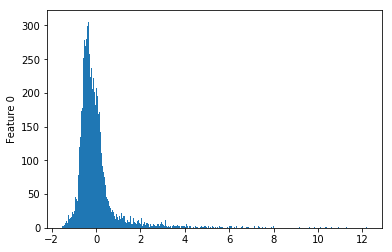

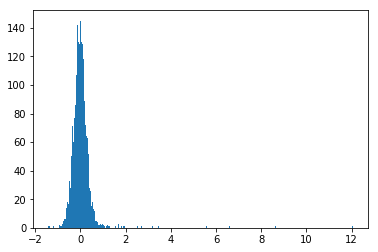

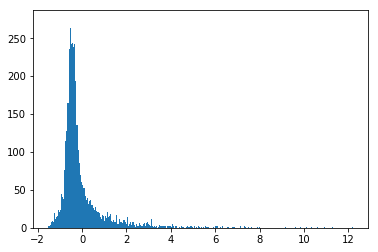

1


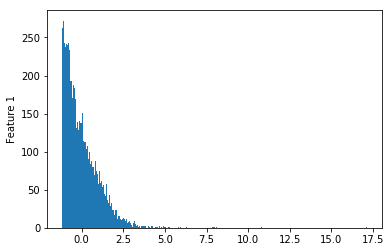

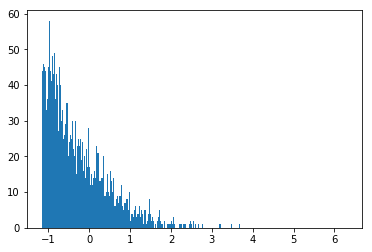

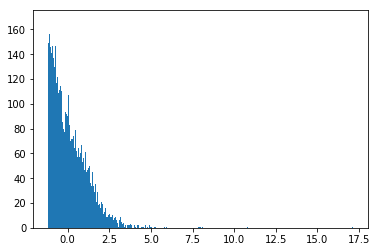

2


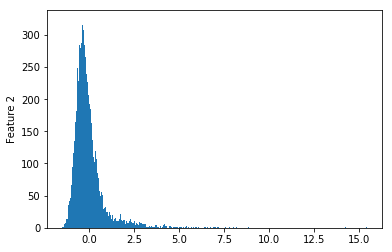

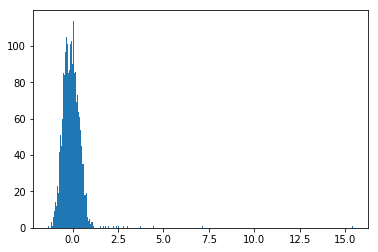

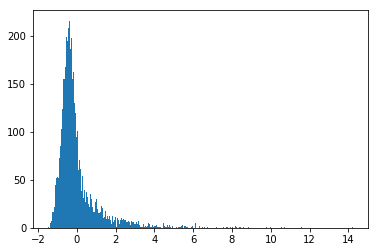

3


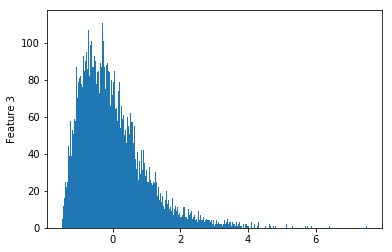

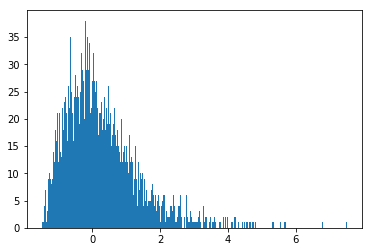

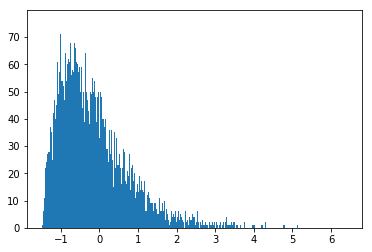

4


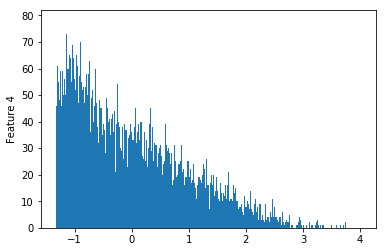

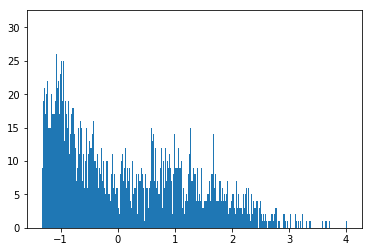

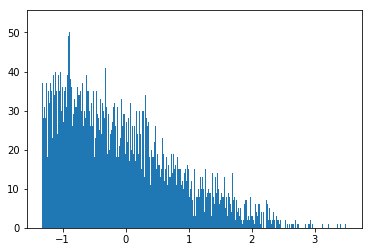

5


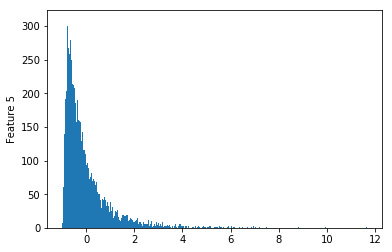

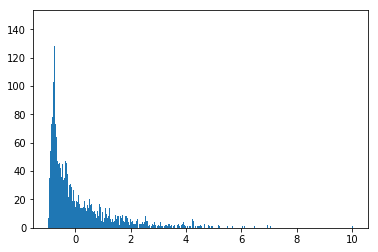

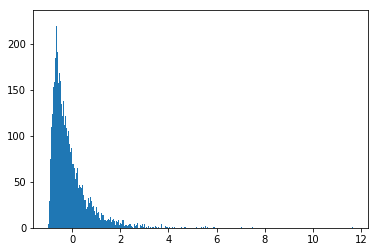

6


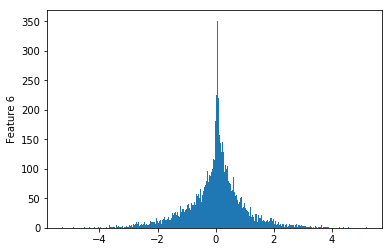

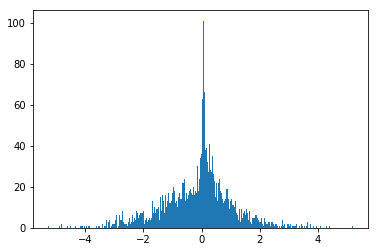

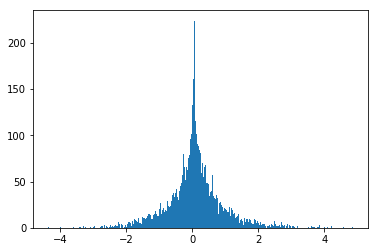

7


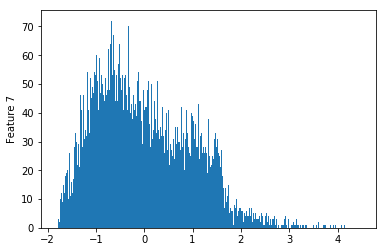

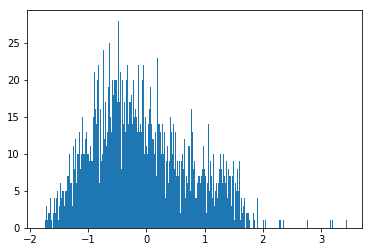

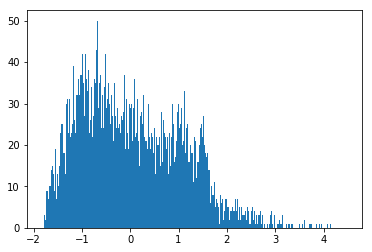

8


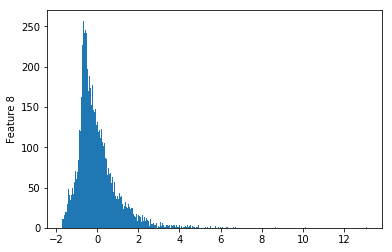

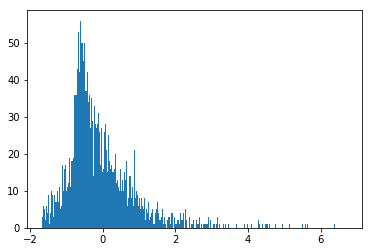

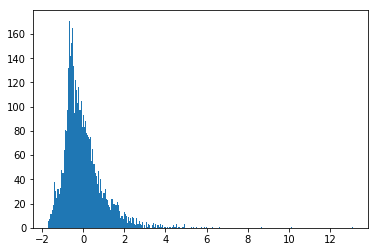

9


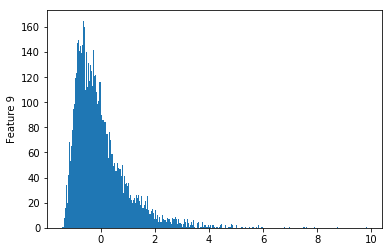

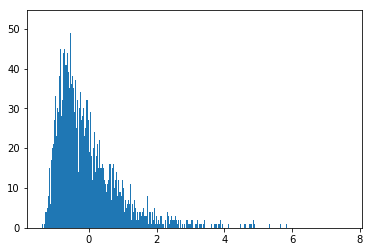

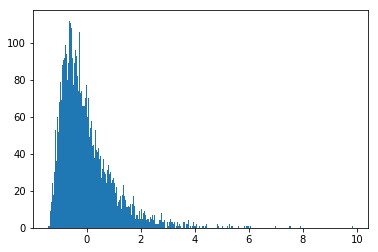

10


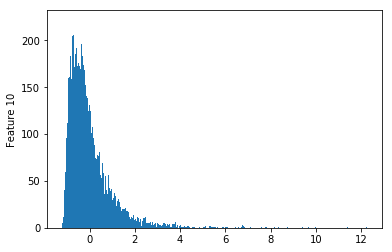

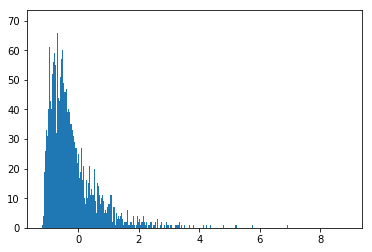

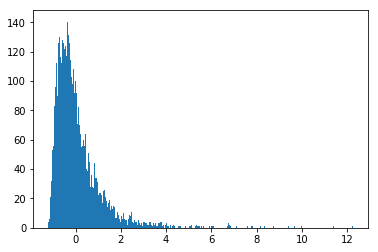

11


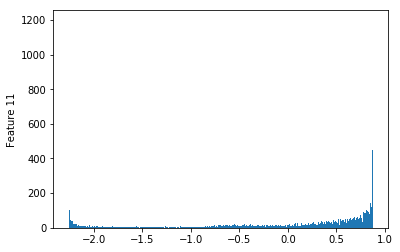

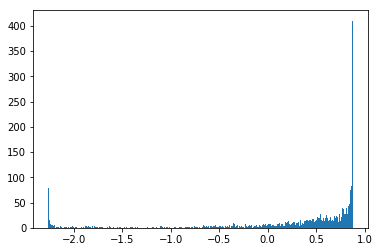

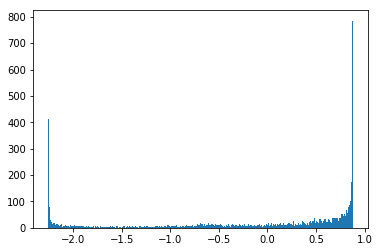

12


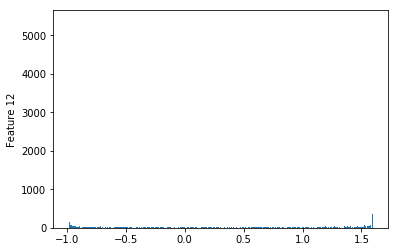

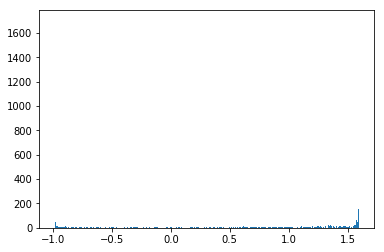

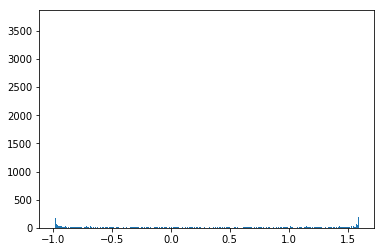

13


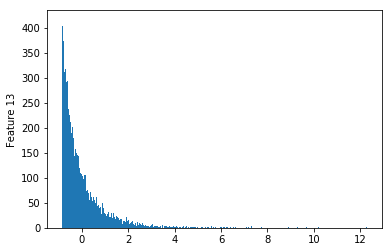

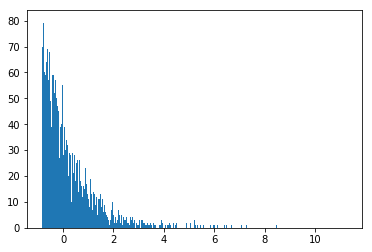

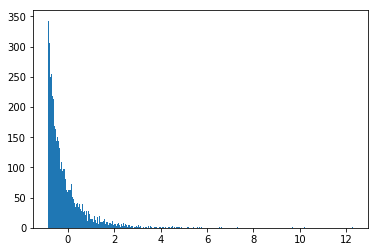

14


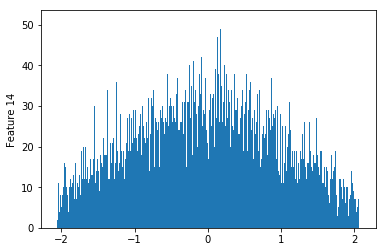

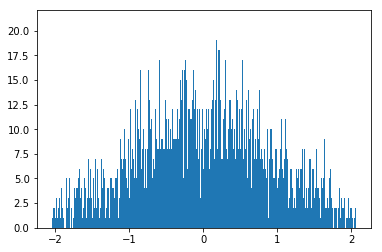

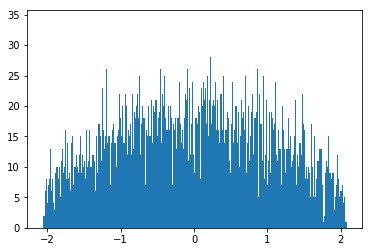

15


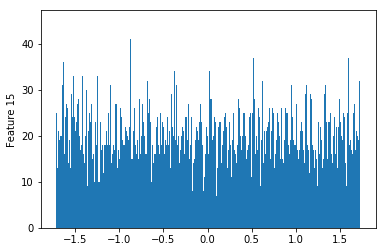

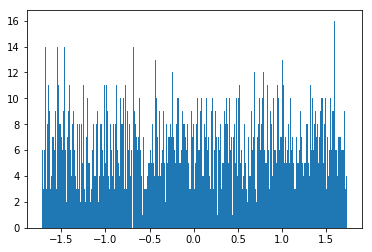

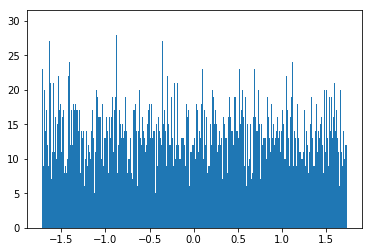

16


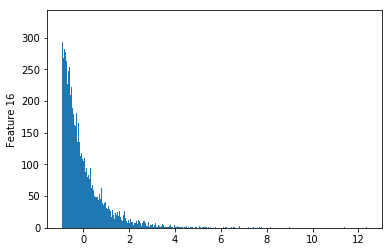

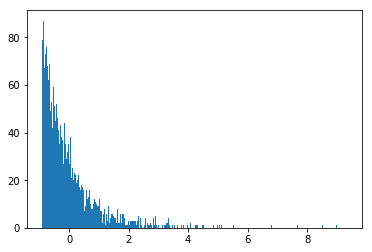

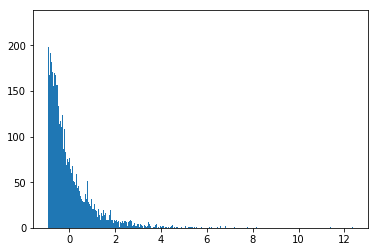

17


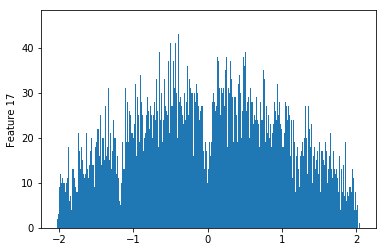

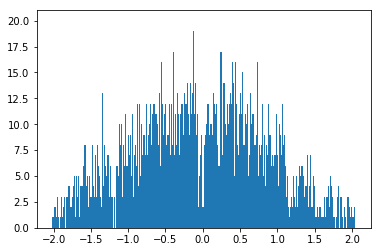

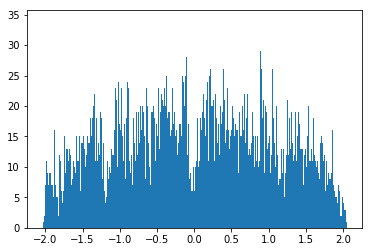

18


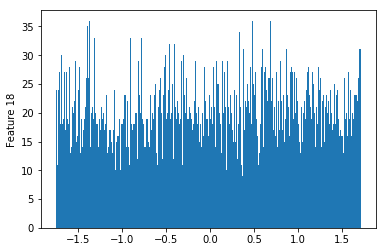

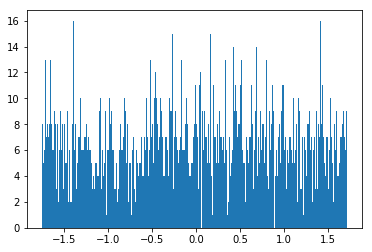

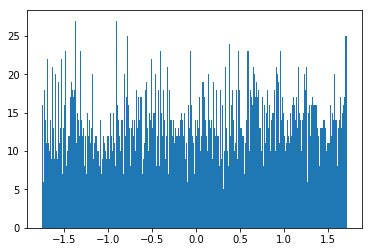

19


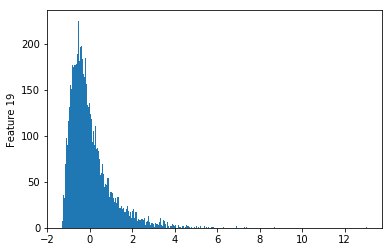

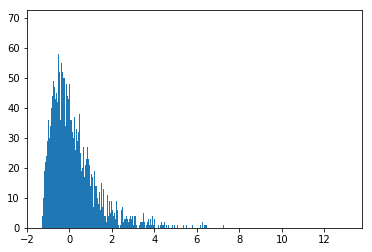

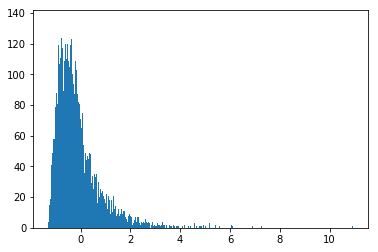

20


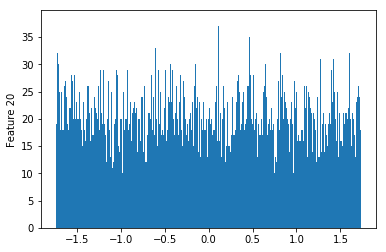

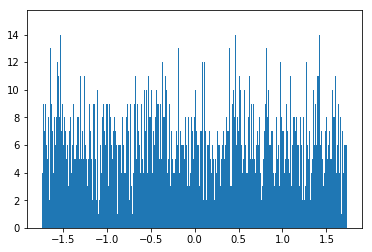

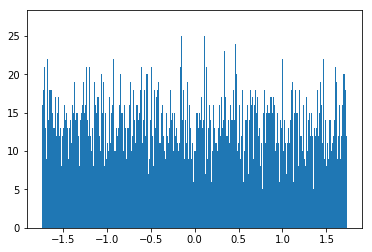

21


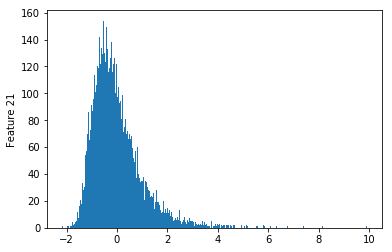

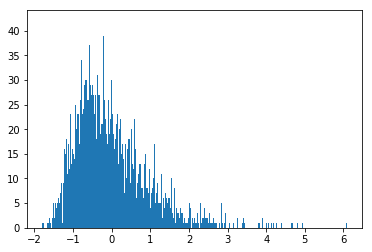

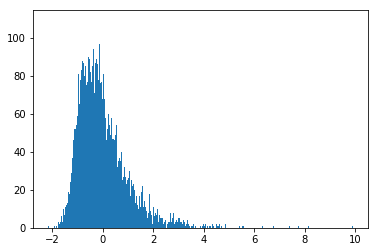

22


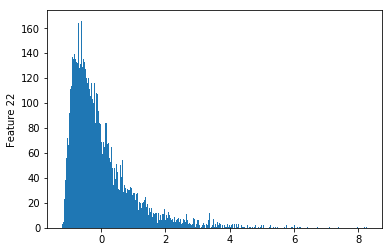

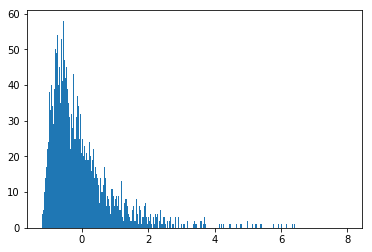

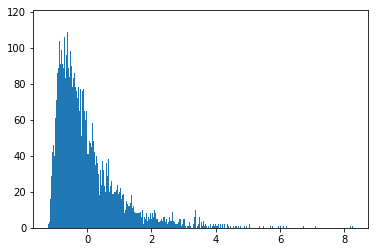

23


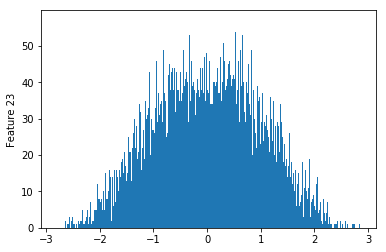

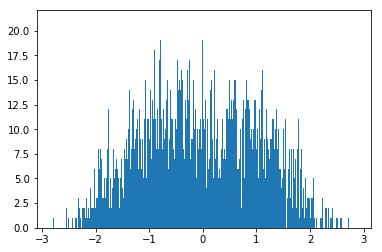

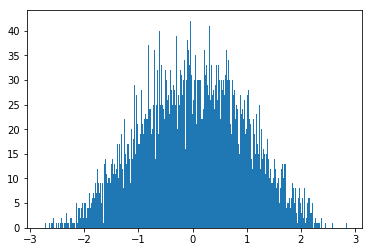

24


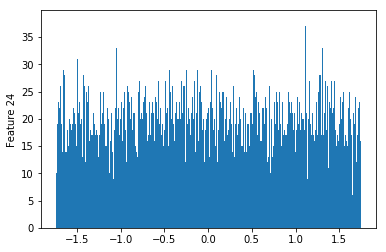

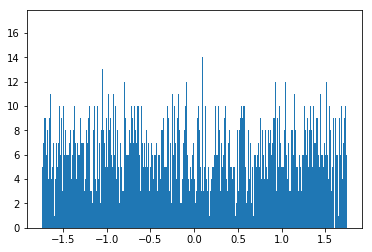

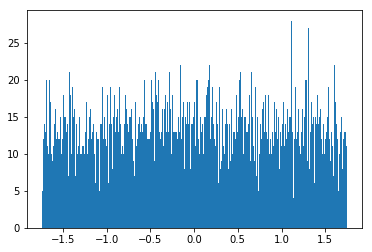

25


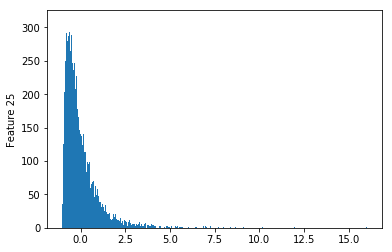

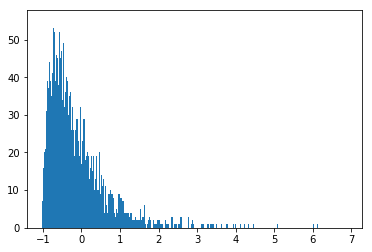

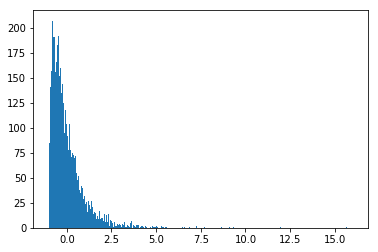

26


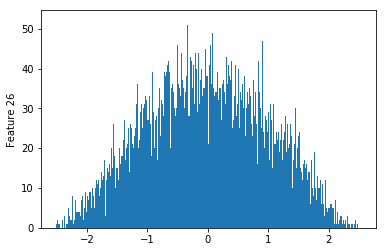

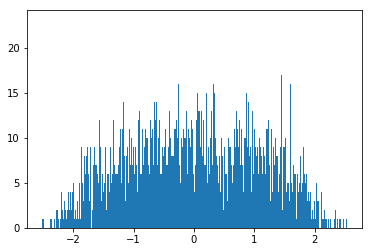

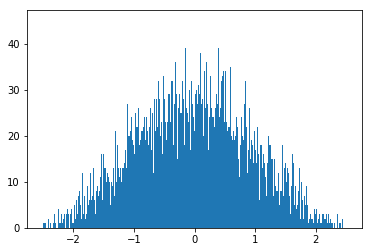

27


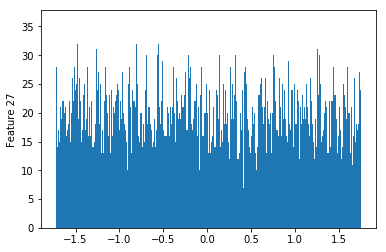

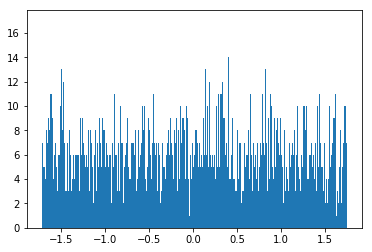

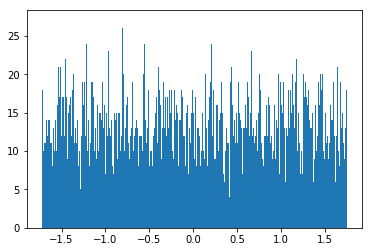

28


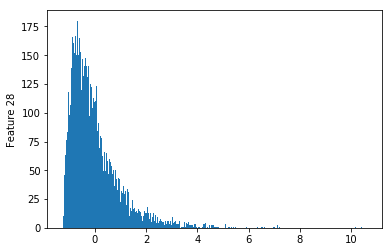

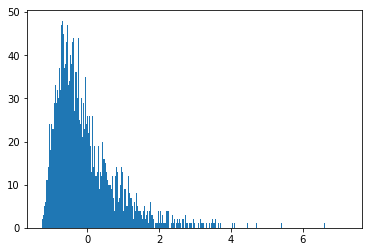

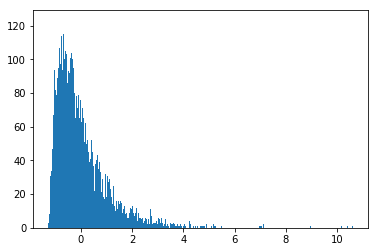

In [220]:
def histo(index_feature, yb, data,bins):
    #print(yb)
    data_array = data[:,index_feature]
    #print data_array.shape

    data_mask = np.where(np.array(yb)>0, True, False) # Transforming in a boolean mask
    #print np.mean(data_array)
    #print np.std(data_array)
    plt.hist(data_array,bins)
    plt.ylabel("Feature "+str(index_feature))
    plt.figure()
    plt.hist(data_array[data_mask],bins)
    plt.figure()
    plt.hist(data_array[np.invert(data_mask)],bins)
    plt.show()

set = 7
for i in range(len(D[set][1][0])):
    print(i)
    histo(i,D[set][0],D[set][1],1000)